# PaCMAP Visualization

## Where the data at?

In [1]:
input_path = '../Data/Processed_Data/'
output_path = '../Data/Processed_Data/'

## Load Datasets

In [2]:
import pandas as pd

x_train = pd.read_pickle(input_path+'embedding.pkl')
x_test = pd.read_pickle(input_path+'embedding_test.pkl')

In [3]:
nanopore_sample = pd.read_pickle(input_path+'embedding_nano.pkl')

In [4]:
y = pd.read_csv(input_path+'y.csv', index_col=0)

In [5]:
labels = pd.read_excel('../Data/Raw_Data/Clinical_Data/labelsCOG_WHOClass.xlsx', index_col=0)
labels = pd.concat([y, labels], axis=1)
labels = labels[labels.index.isin(x_train.index)]['WHO Classification']
y = y.join(labels.to_frame('WHO Classification'))

In [6]:
y['Methyl Class'] = y[y['WHO Classification'].isin(['KMT2A-rearrangement',
                                                    'Other or Undefined',
                                                    't(8;21)(q22;q22); RUNX1::RUNX1T1',
                                                    'inv(16)(p13.1q22) or t(16;16)(p13.1;q22); CBFB::MYH11',
                                                    'NUP98-fusion',
                                                    't(6;9)(p23;q34.1); DEK::NUP214',
                                                    'mutated CEBPA'])]['WHO Classification']

y['t(8;16)'] = y[y['WHO Classification'].isin(['t(8;16)(p11.2;p13.3); KAT6A::CREBBP'])]['WHO Classification']
y['t(8;16)'] = y['t(8;16)'].fillna('Other')

y['t(1;22)'] = y[y['WHO Classification'].isin(['t(1;22)(p13.3;q13.1); RBM15::MKL1'])]['WHO Classification']
y['t(1;22)'] = y['t(1;22)'].fillna('Other')

y['Complex Karyotype'] = y[y['Karyotype Complexity 4'].isin(['4 or more'])]['Karyotype Complexity 4']
y['Complex Karyotype'] = y['Complex Karyotype'].fillna('Less than 4')                                         

y['KMT2A Fusions'] = y[y['WHO Classification'].isin(['KMT2A-rearrangement'])]['Gene Fusion']  

y['KMT2A Rearrangement'] = y[y['WHO Classification'].isin(['KMT2A-rearrangement'])]['WHO Classification']
y['KMT2A Rearrangement'] = y['KMT2A Rearrangement'].fillna('Other')

In [7]:
y['CBFA2T3-GLIS2'] = y[y['WHO Classification'].isin(['CBFA2T3::GLIS2 (inv(16)(p13q24))'])]['WHO Classification']
y['CBFA2T3-GLIS2'] = y['CBFA2T3-GLIS2'].fillna('Other')

In [8]:
y['t(16;21)'] = y[y['WHO Classification'].isin(['t(16;21)(p11;q22); FUS::ERG'])]['WHO Classification']
y['t(16;21)'] = y['t(16;21)'].fillna('Other')

In [9]:
y_train = y[~y['Clinical Trial'].isin(['AML02','AML08'])]
y_test = y[y['Clinical Trial'].isin(['AML02','AML08'])]

## Data Visualization

In [10]:
from FM_Functions.Data_Visualization import draw_pacmap

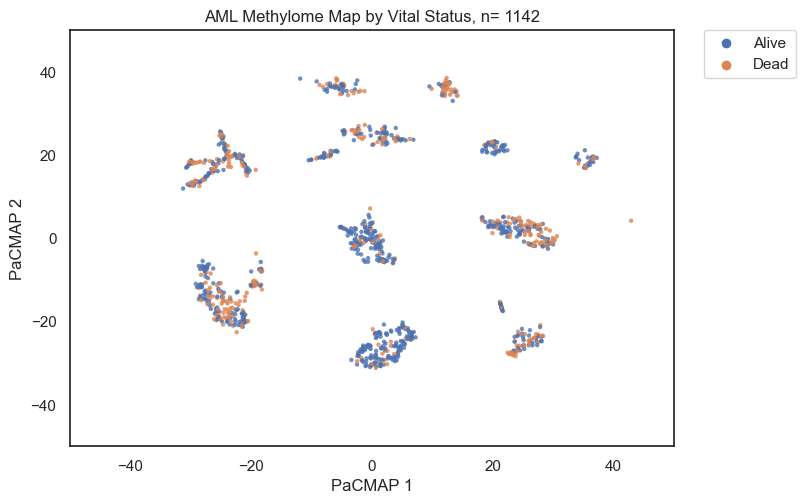

In [11]:
draw_pacmap(x_train.to_numpy(), y_train, 'Vital Status', test_sample=None, panel_size=50, legend=True)

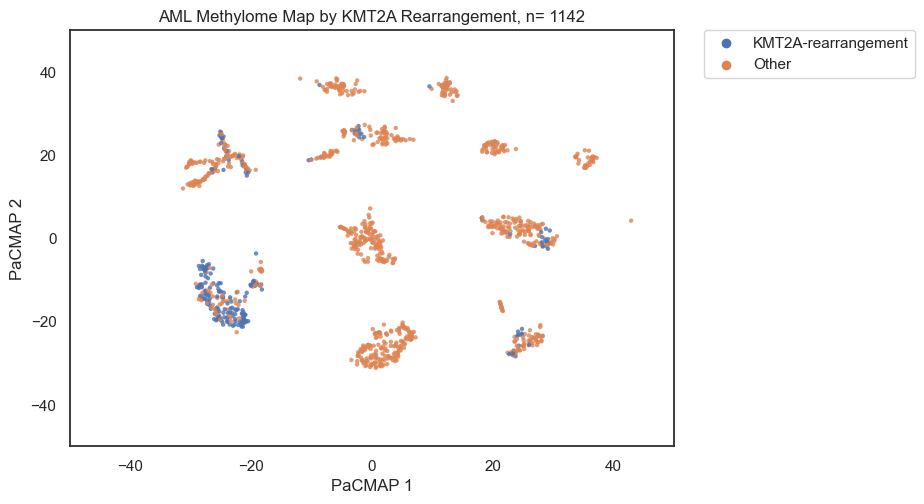

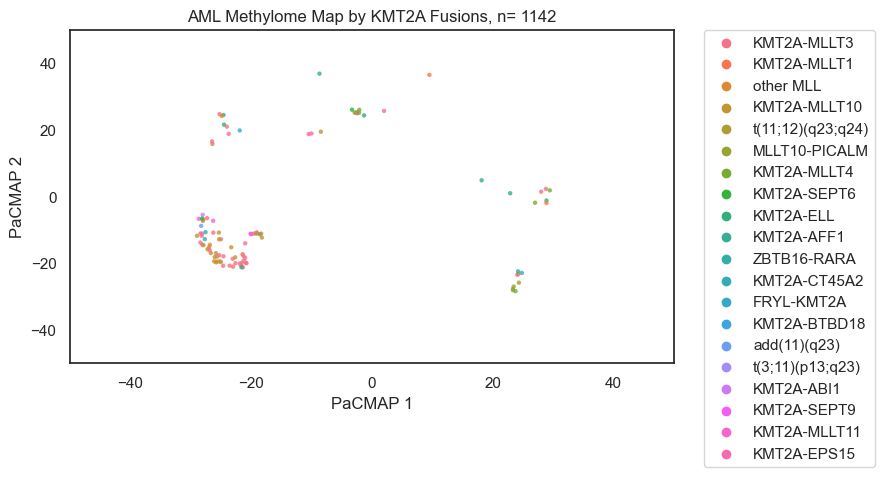

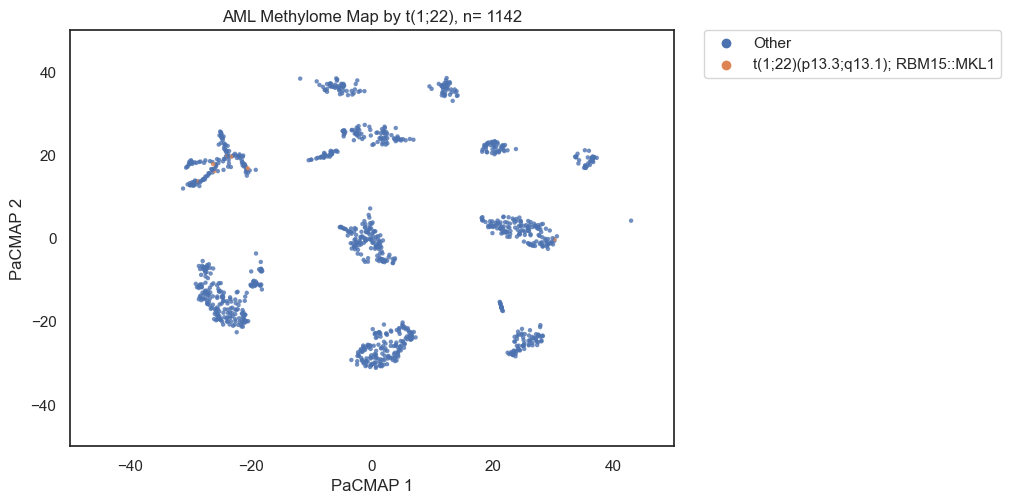

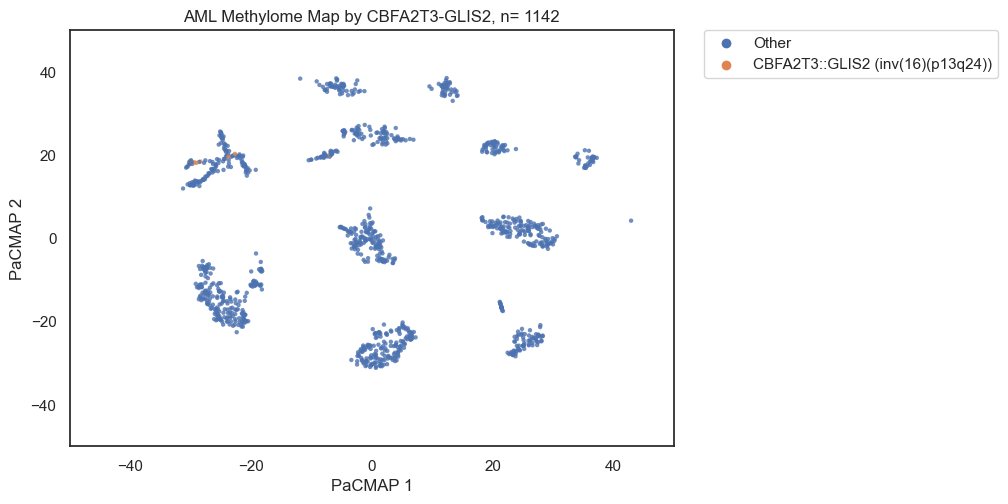

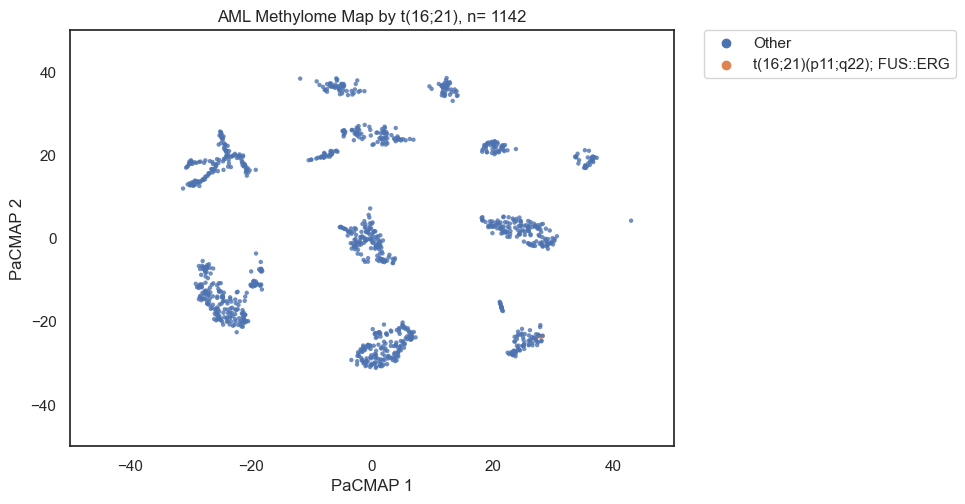

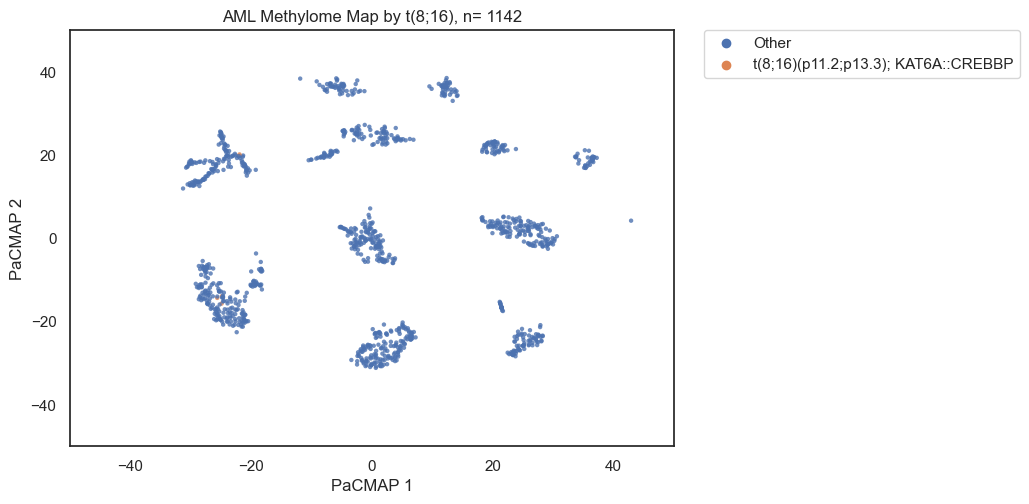

In [12]:
draw_pacmap(x_train.to_numpy(), y_train, 'KMT2A Rearrangement', test_sample=None, panel_size=50)
draw_pacmap(x_train.to_numpy(), y_train, 'KMT2A Fusions', test_sample=None, panel_size=50)
draw_pacmap(x_train.to_numpy(), y_train, 't(1;22)', test_sample=None, panel_size=50)
draw_pacmap(x_train.to_numpy(), y_train, 'CBFA2T3-GLIS2', test_sample=None, panel_size=50)
draw_pacmap(x_train.to_numpy(), y_train, 't(16;21)', test_sample=None, panel_size=50)
draw_pacmap(x_train.to_numpy(), y_train, 't(8;16)', test_sample=None, panel_size=50)

In [13]:
y['WHO Classification'].value_counts()

KMT2A-rearrangement                                      217
Other or Undefined                                       207
t(8;21)(q22;q22); RUNX1::RUNX1T1                         152
inv(16)(p13.1q22) or t(16;16)(p13.1;q22); CBFB::MYH11    129
NUP98-fusion                                             127
Cytogenetically Normal                                   111
mutated CEBPA                                             43
myelodysplasia-related changes                            37
t(6;9)(p23;q34.1); DEK::NUP214                            25
CBFA2T3::GLIS2 (inv(16)(p13q24))                           8
t(1;22)(p13.3;q13.1); RBM15::MKL1                          7
ETV6-fusion                                                5
t(16;21)(p11;q22); FUS::ERG                                4
t(8;16)(p11.2;p13.3); KAT6A::CREBBP                        4
mutated NPM1                                               2
Name: WHO Classification, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


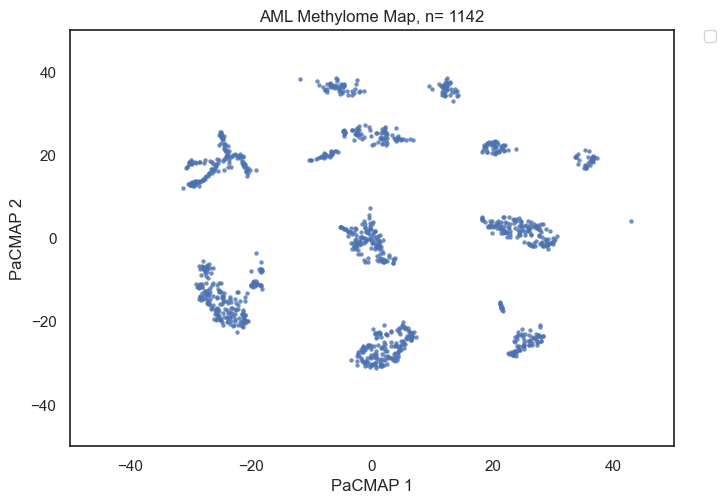

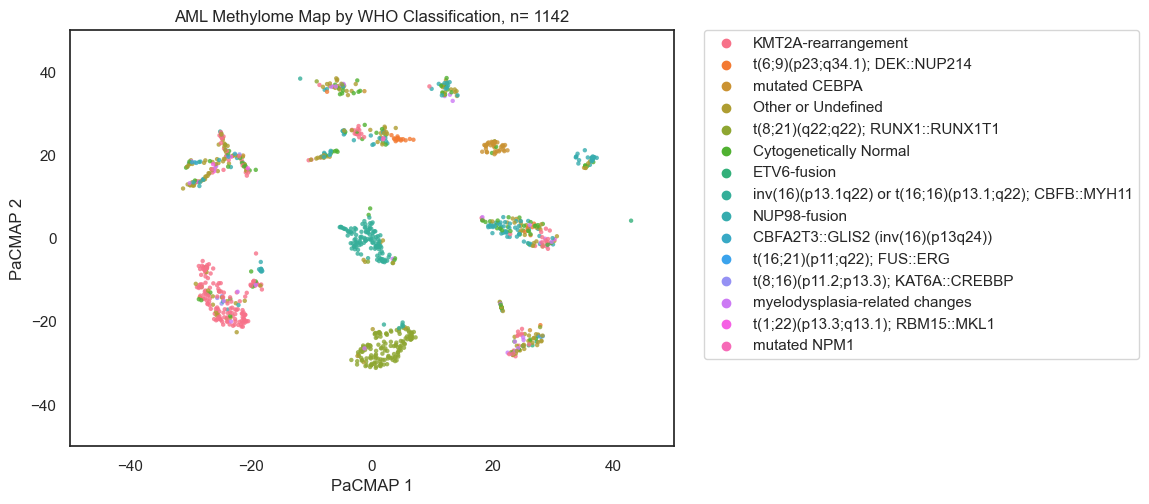

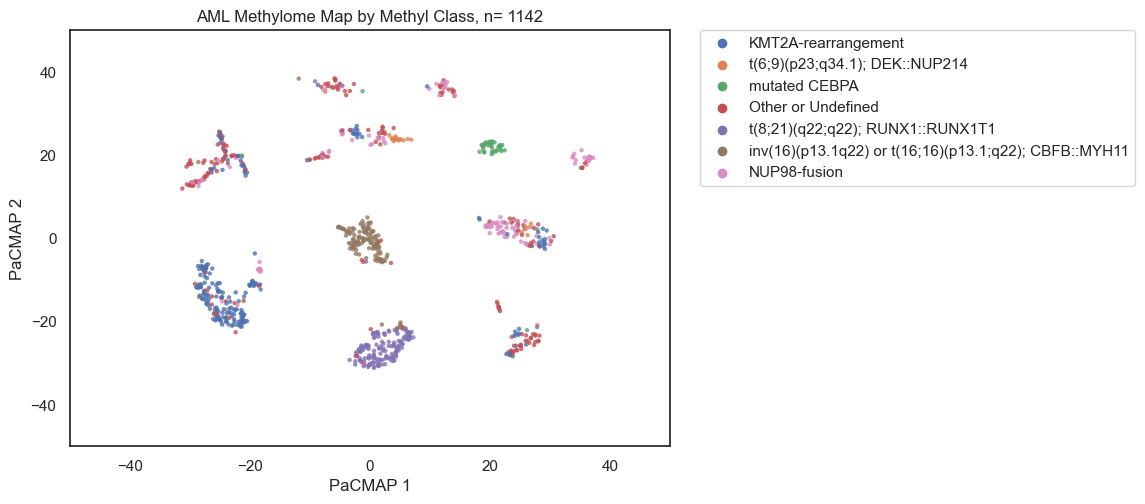

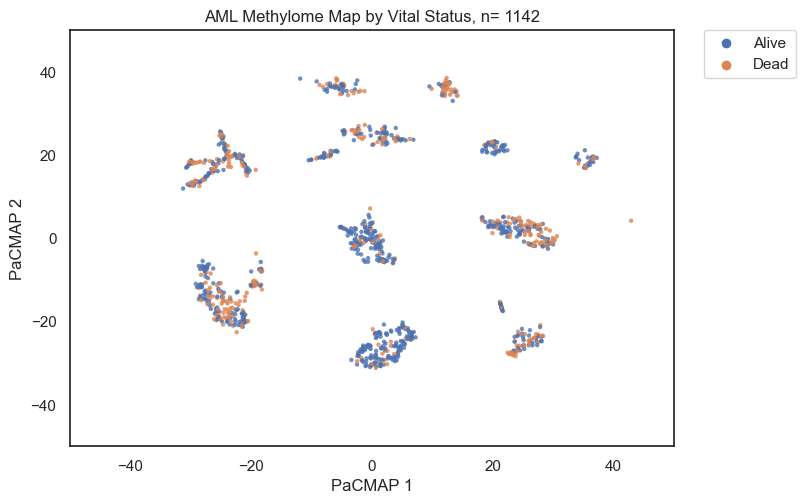

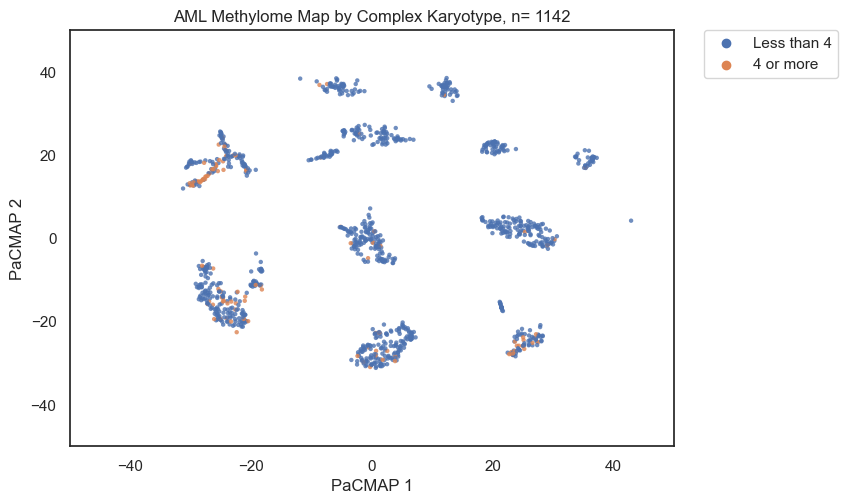

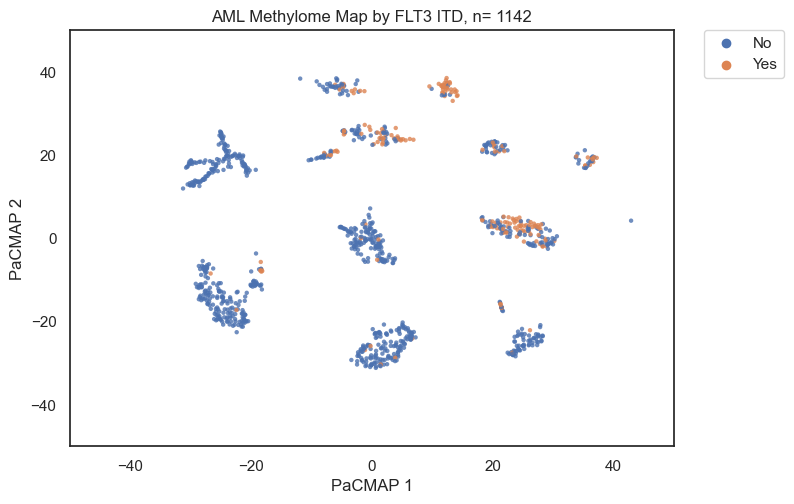

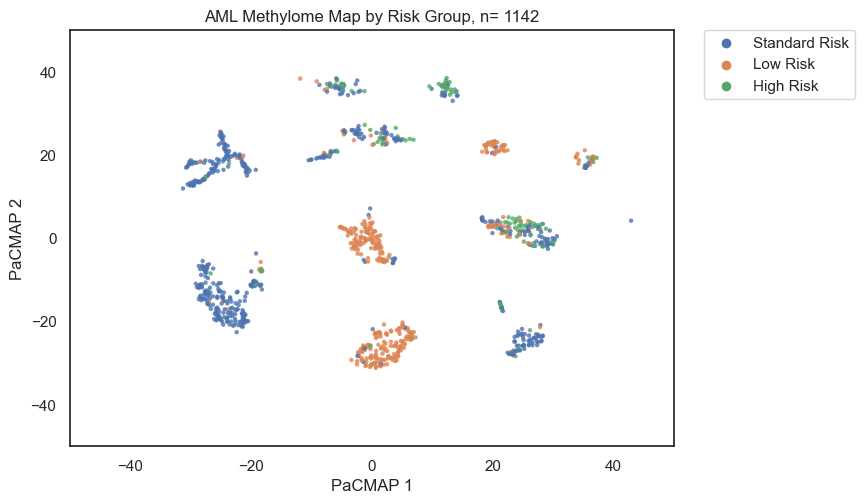

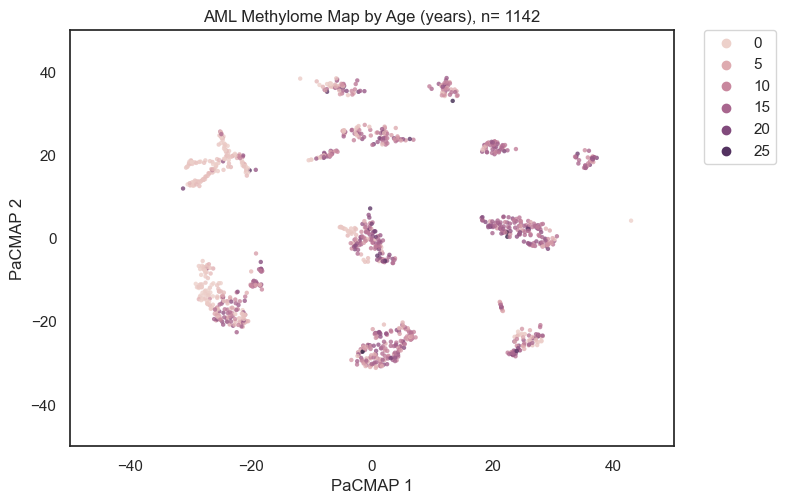

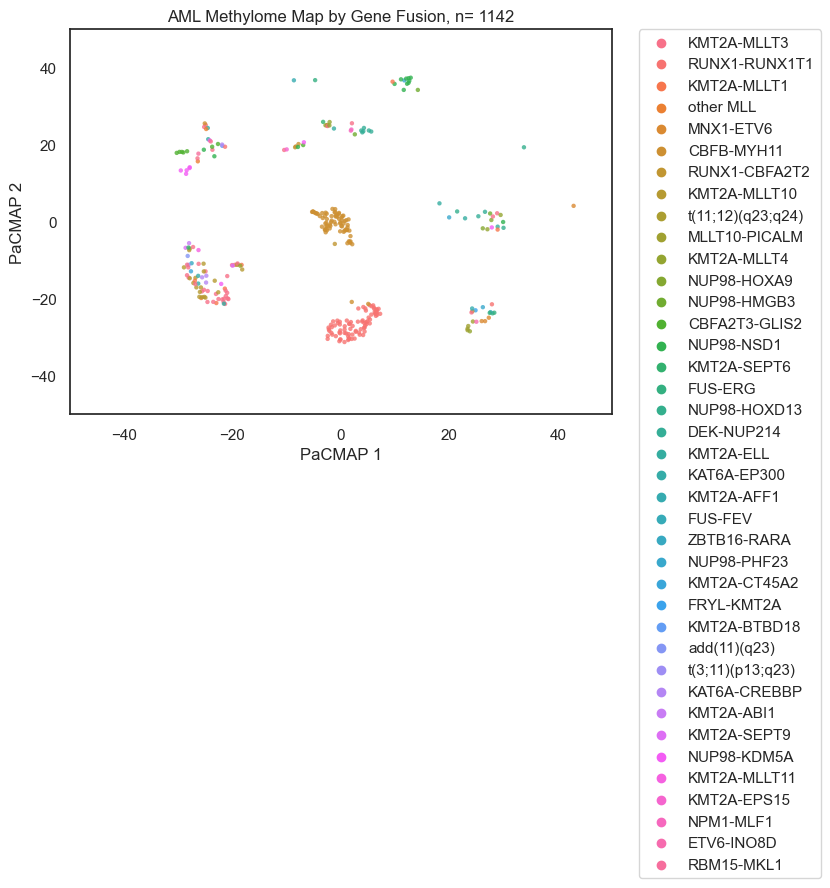

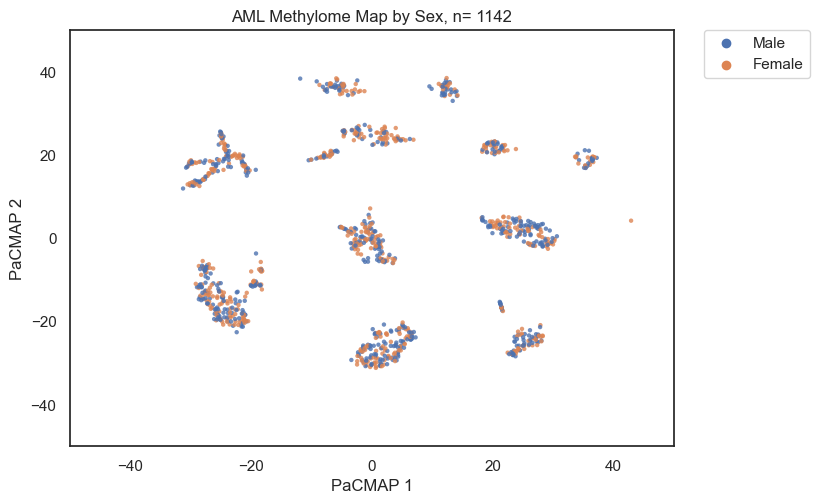

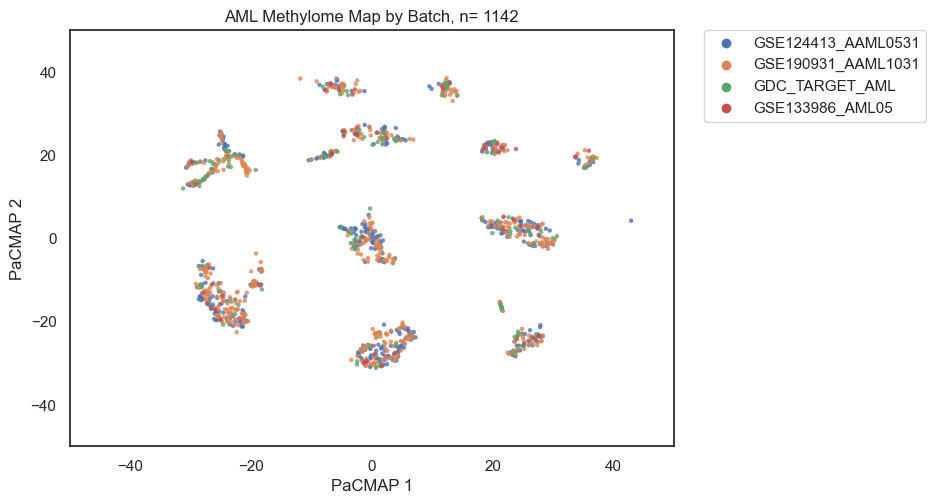

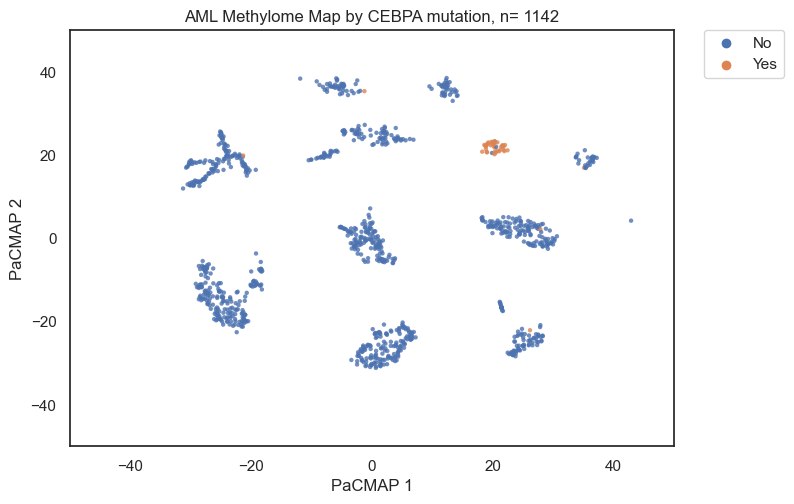

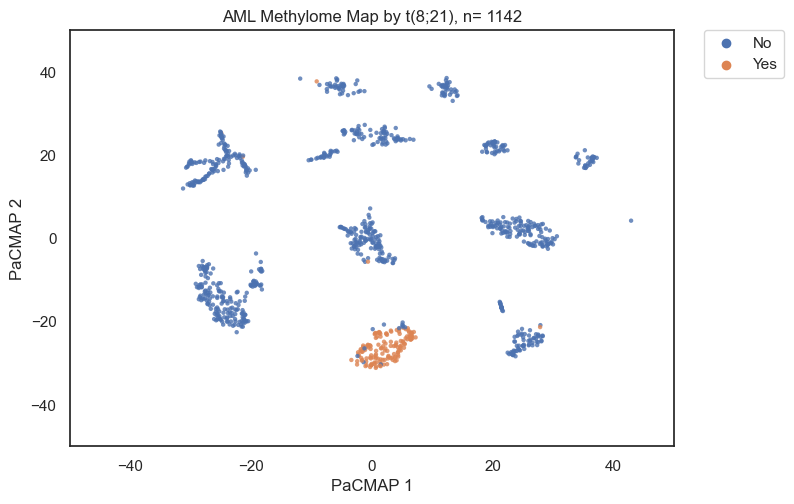

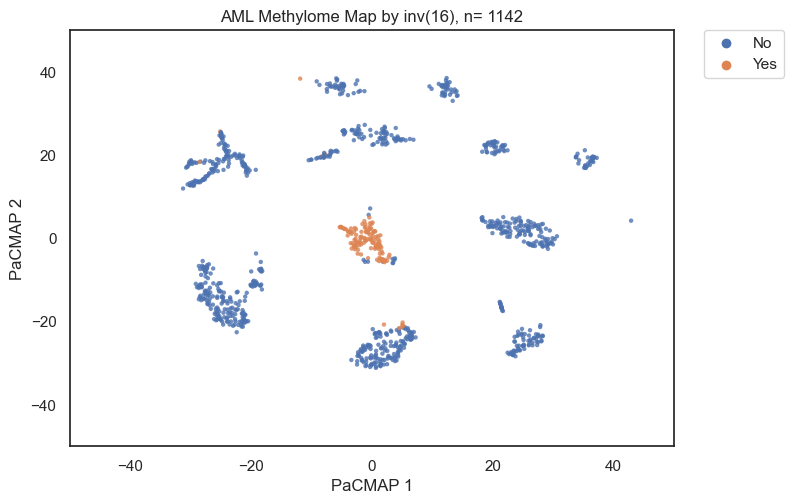

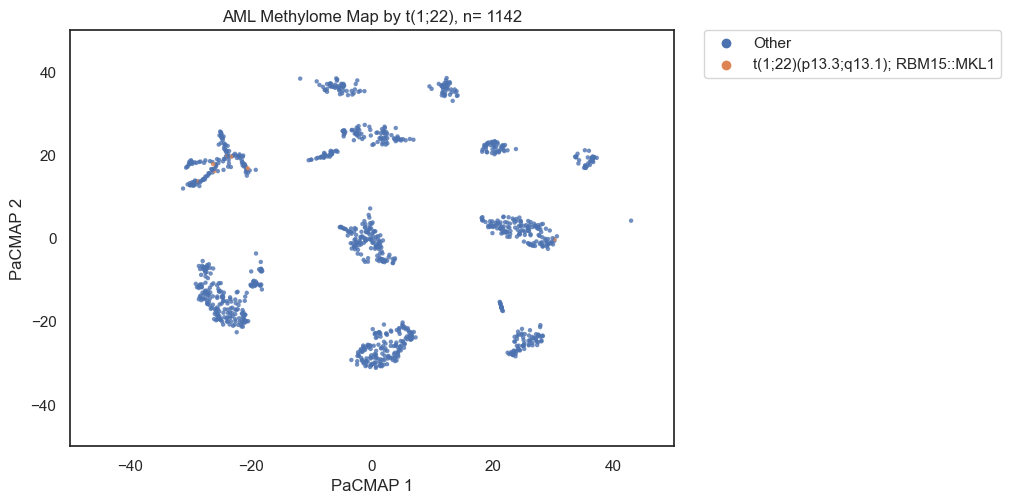

In [14]:
list = [None,'WHO Classification', 'Methyl Class', 'Vital Status',
        'Complex Karyotype','FLT3 ITD','Risk Group','Age (years)',
        'Gene Fusion', 'Sex', 'Batch', 'CEBPA mutation', 't(8;21)',
        'inv(16)','t(1;22)']

for i in list:
    draw_pacmap(x_train.to_numpy(), y_train, i, test_sample=None, panel_size=50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


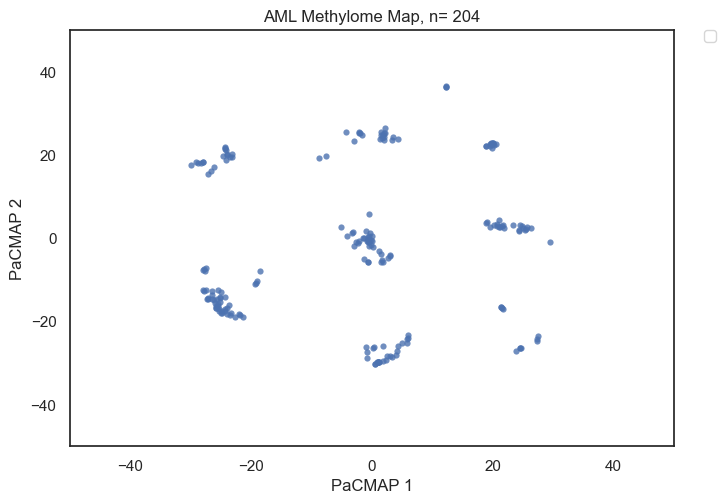

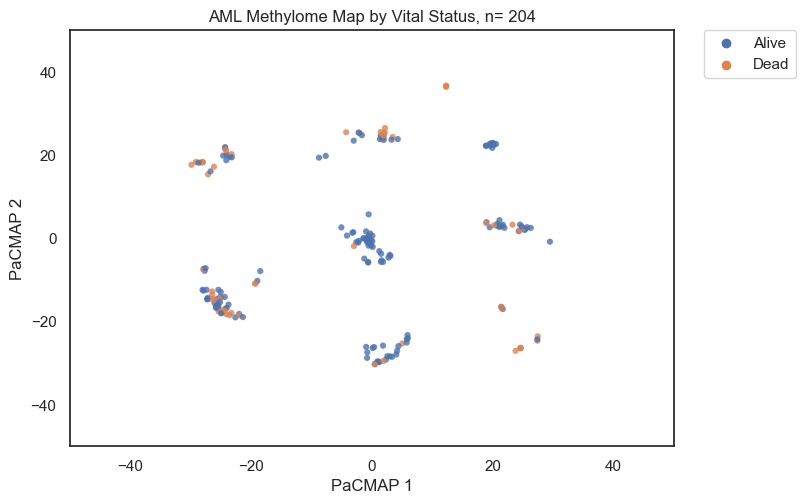

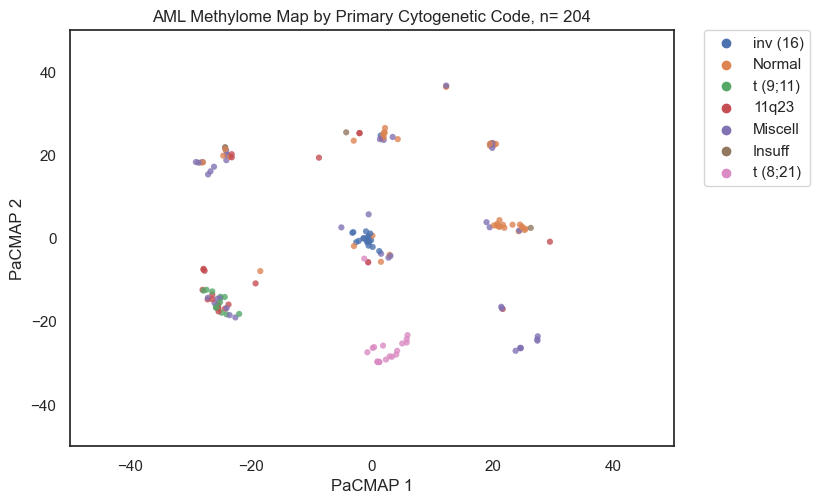

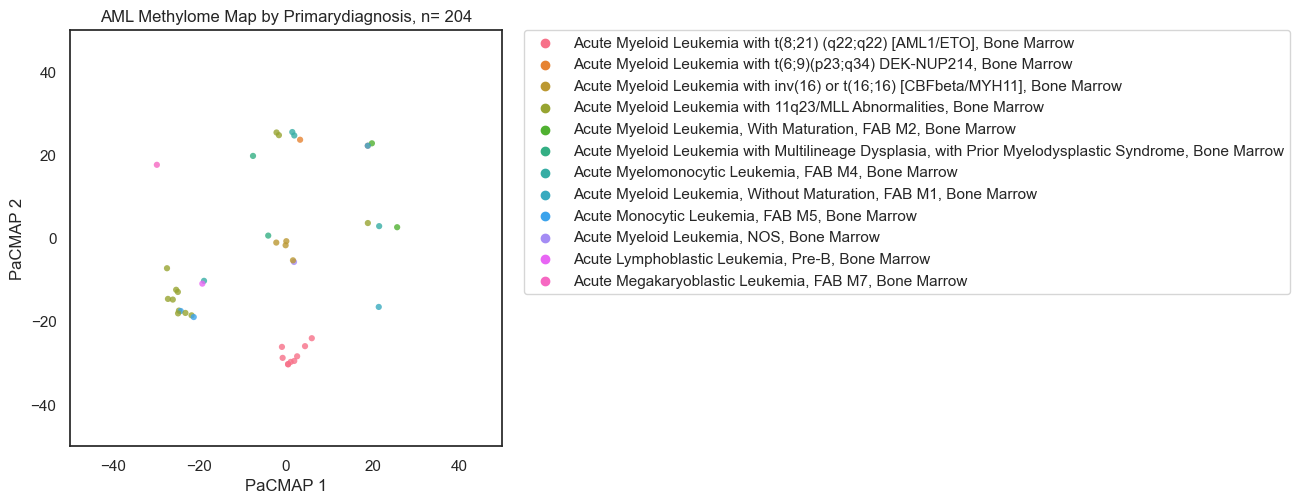

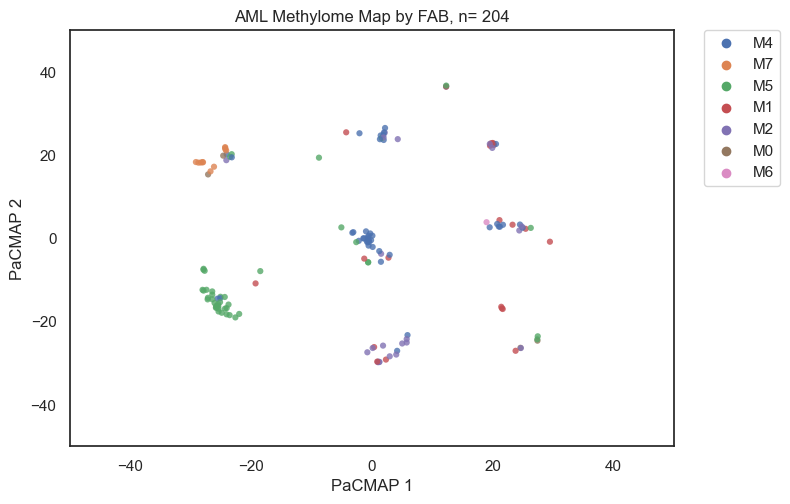

In [15]:
list = [None,'Vital Status', 'Primary Cytogenetic Code','Primarydiagnosis' ,'FAB',]

for i in list:
    draw_pacmap(x_test.to_numpy(), y_test, i, test_sample=None, panel_size=50,s=20)

In [16]:
def select_range(df, x_range, y_range):
    """
    This function takes in a 2D pandas DataFrame, along with selected range for each dimension and returns all samples within the selected range.

    Parameters:
    ------------
    df (DataFrame):
        A 2D pandas DataFrame.
    x_range (tuple):
        A tuple containing the min and max values for the x dimension.
    y_range (tuple):
        A tuple containing the min and max values for the y dimension.
    Returns:
    ------------
    DataFrame:
        A DataFrame containing all samples within the selected range.
    """
    x_min, x_max = x_range
    y_min, y_max = y_range

    return df[(df['PaCMAP 1'] >= x_min) & (df['PaCMAP 1'] <= x_max) & (df['PaCMAP 2'] >= y_min) & (df['PaCMAP 2'] <= y_max)]

#cluster = select_range(df=y, x_range=(20, 40), y_range=(-40,-20))

In [17]:
y2 = y.join(x_train)

In [18]:
kmt2a_top = select_range(df=y2, x_range=(-10, 10), y_range=(20,40))['KMT2A Fusions'].dropna().value_counts()
kmt2a_south = select_range(df=y2, x_range=(20, 50), y_range=(-0,-40))['KMT2A Fusions'].dropna().value_counts()

In [19]:
kmt2a_south

Series([], Name: KMT2A Fusions, dtype: int64)

In [20]:
kmt2a_top

KMT2A-MLLT4    4
KMT2A-MLLT3    2
KMT2A-SEPT6    1
other MLL      1
KMT2A-AFF1     1
KMT2A-MLLT1    1
KMT2A-ELL      1
Name: KMT2A Fusions, dtype: int64

## Bokeh

In [21]:
# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.layouts import row 
# from bokeh.plotting import figure

# output_notebook()

In [22]:
# p = figure(title = "Title")
# p.circle('PaCMAP 1','PaCMAP 2',source=embedding,fill_alpha=0.8, size=5)

# show(p)

In [23]:
# from bokeh.plotting import figure
# from bokeh.models import ColumnDataSource
# from bokeh.transform import factor_cmap, factor_mark

# hue = sorted(y['Methyl Class'].dropna().unique())
# # create a ColumnDataSource by passing the dict
# source = ColumnDataSource(data=y)
# #cmap = sorted(y['Methyl Class'].unique())
# # use the field name of the column source
# #cmap = linear_cmap(field_name='Methyl Class', palette='Viridis256', low=0, high=10)


# # create a plot using the ColumnDataSource's two columns
# p = figure()
# p.scatter(x='PaCMAP 1', y='PaCMAP 2', source=source, fill_alpha=0.8, marker=factor_mark('Methyl Class',markers=['circle_x'],factors=hue), 
#             color=factor_cmap('Methyl Class', palette=, hue),legend_field='Methyl Class')

# show(p)

## Nanopore Sample

In [24]:
y_nano = y_train.append(nanopore_sample.iloc[-1:,:])

In [25]:
nanopore_sample.iloc[-1:,:].values
# Transform into a tuple
nanopore_sample.iloc[-1:,:].values[0].tolist()

[26.49660301208496, -17.835084915161133]

In [26]:
print(26.496603, -17.835085)

26.496603 -17.835085


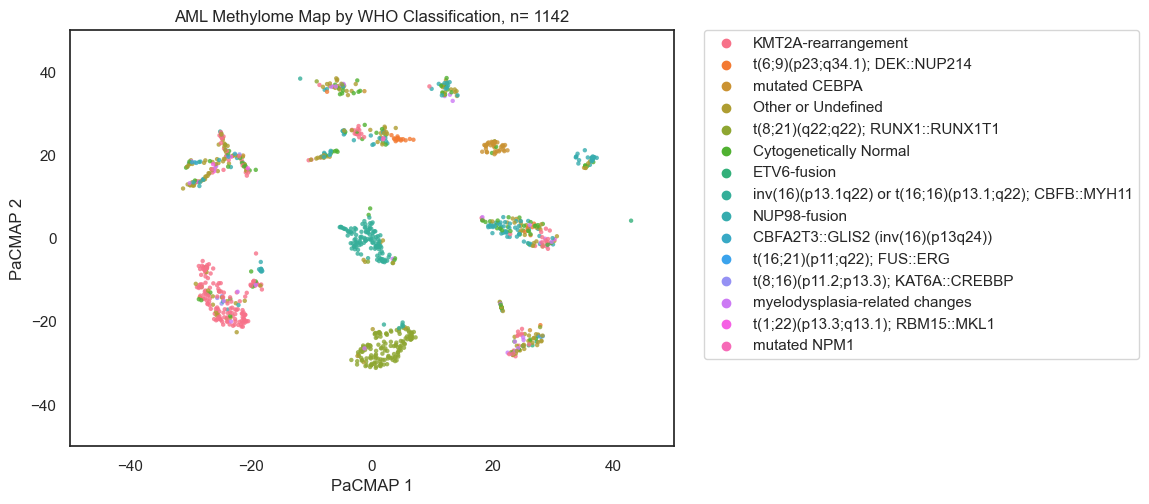

In [27]:
draw_pacmap(x_train.to_numpy(), y_train, 'WHO Classification', panel_size=50)

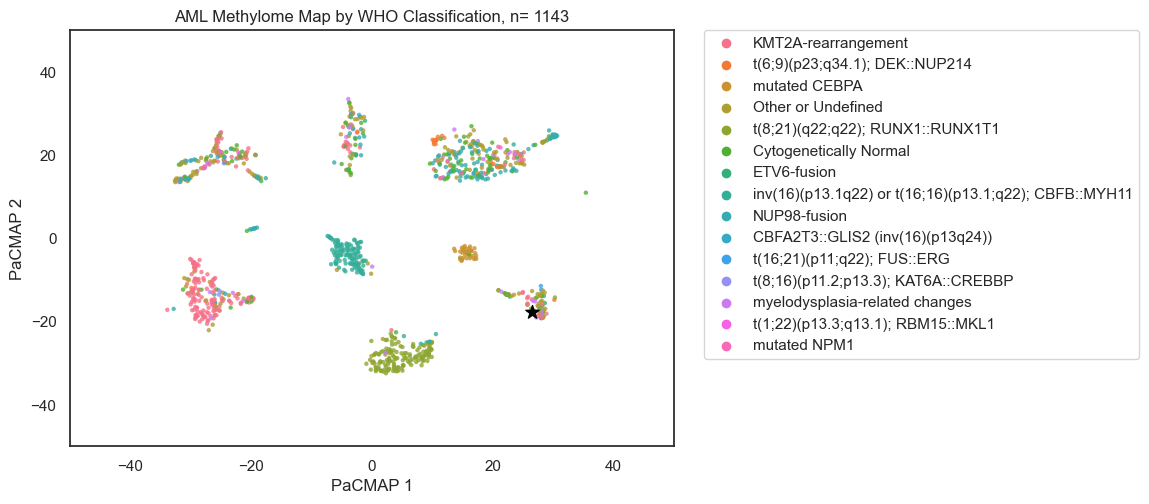

In [28]:

draw_pacmap(nanopore_sample.to_numpy(), y_nano, 'WHO Classification',
            test_sample=nanopore_sample.iloc[-1:,:].values[0].tolist(),
            panel_size=50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


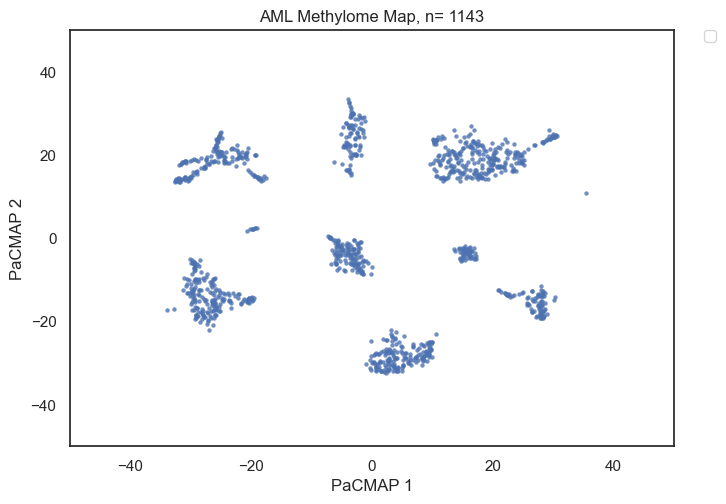

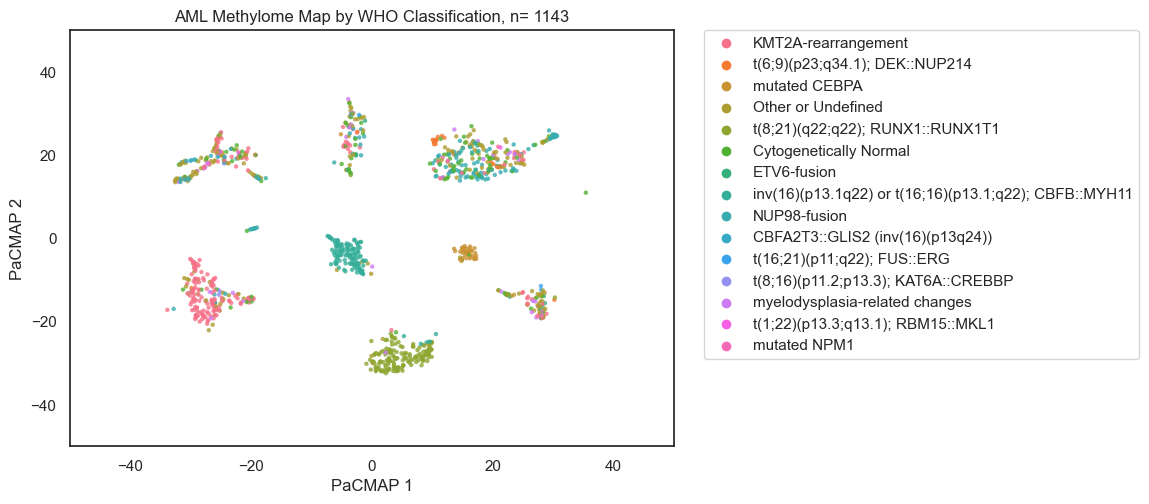

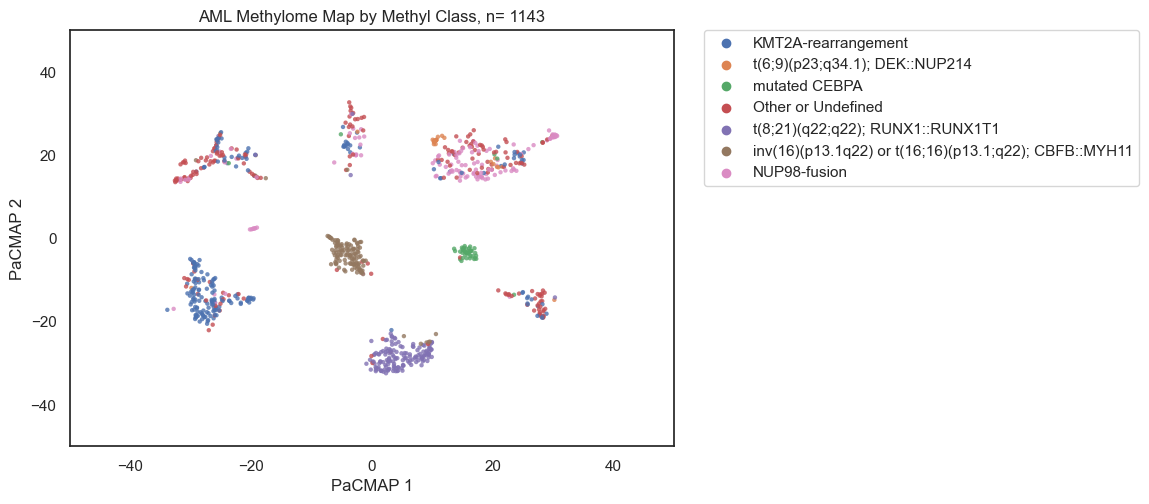

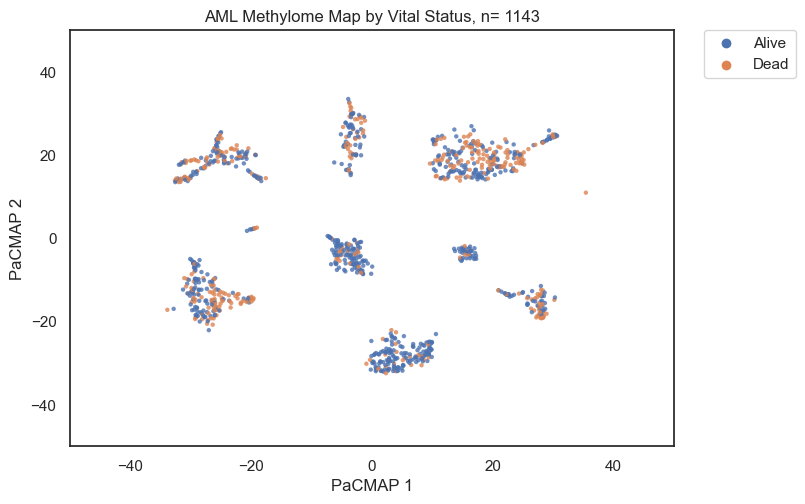

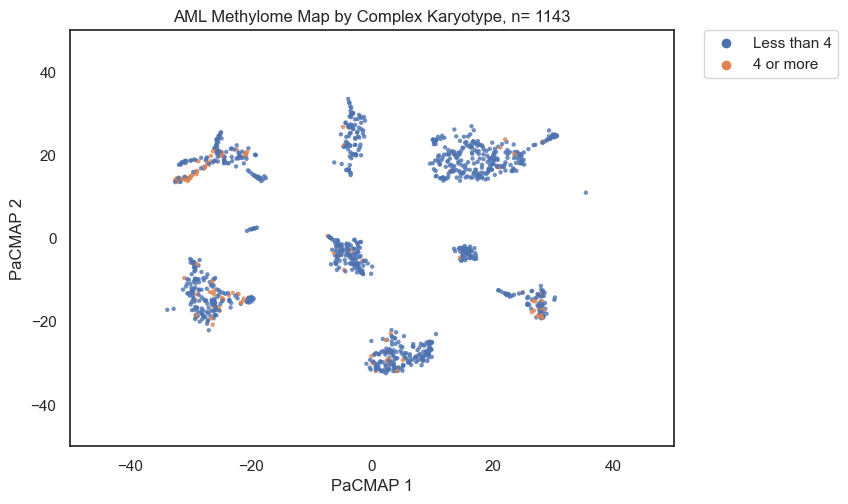

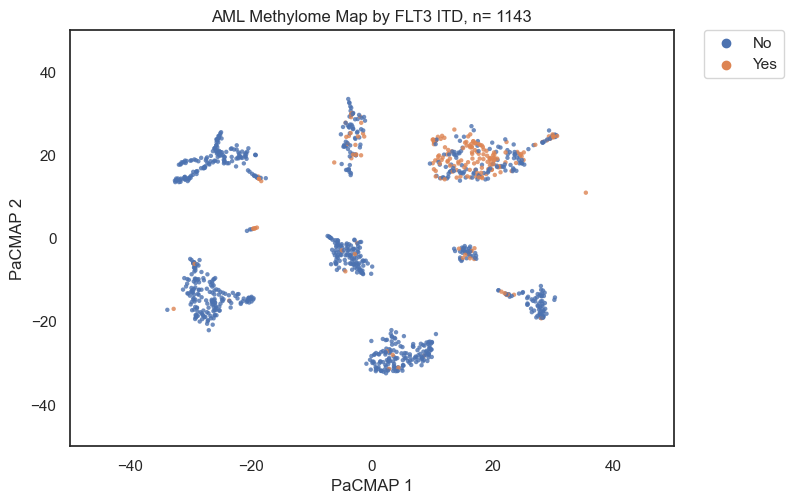

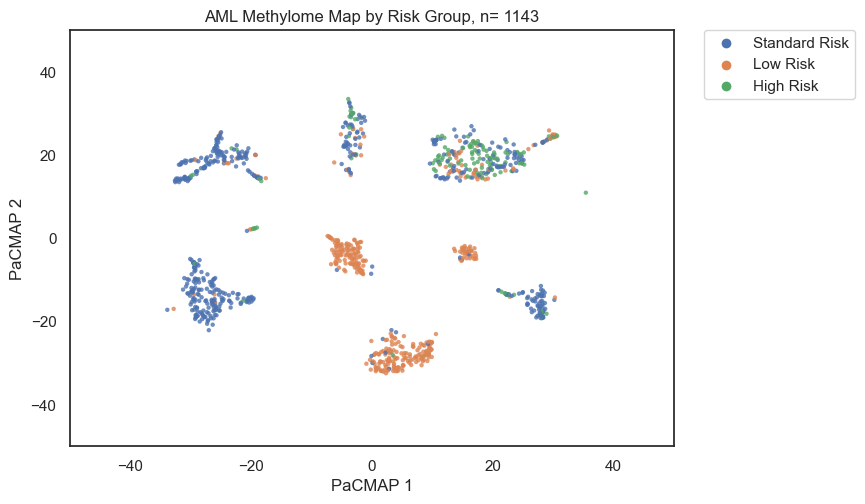

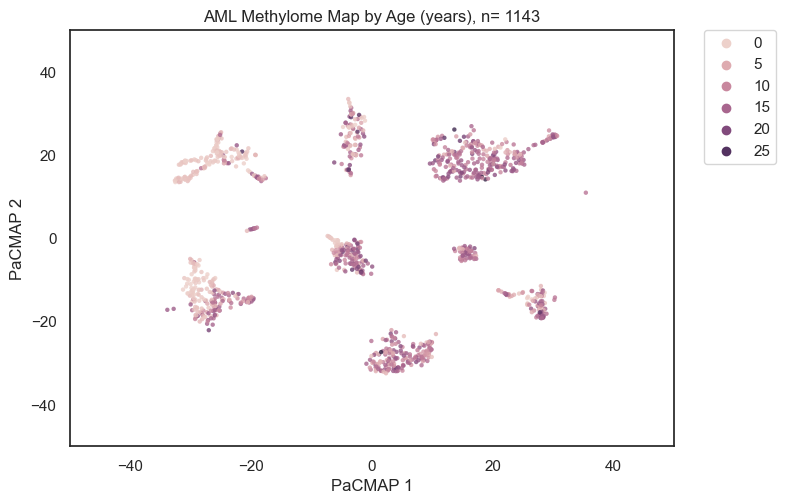

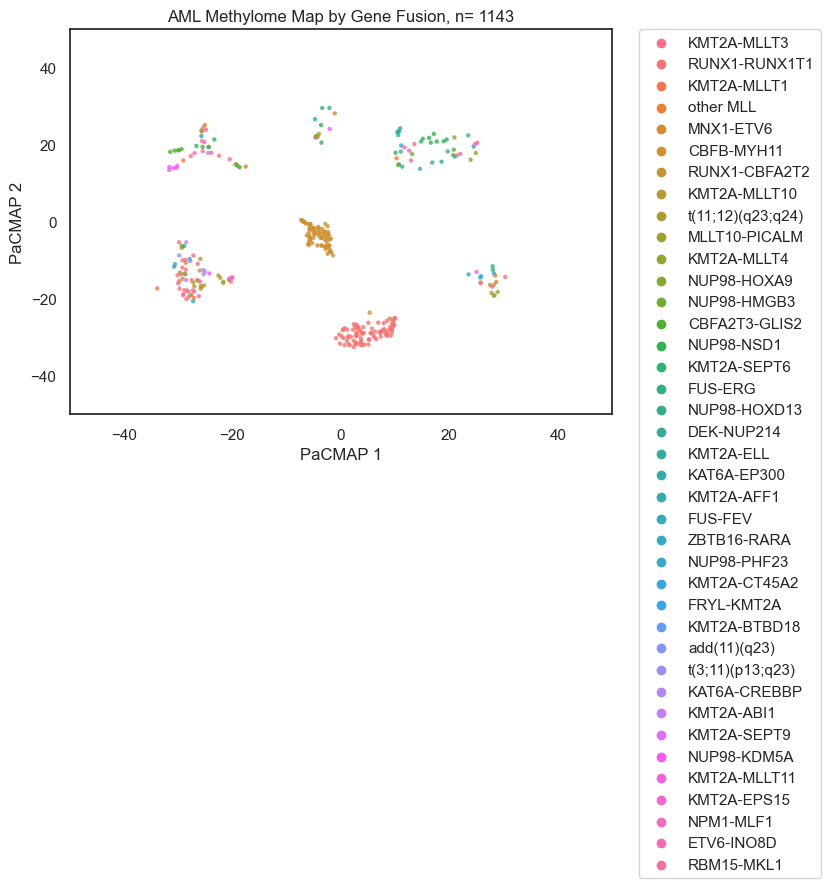

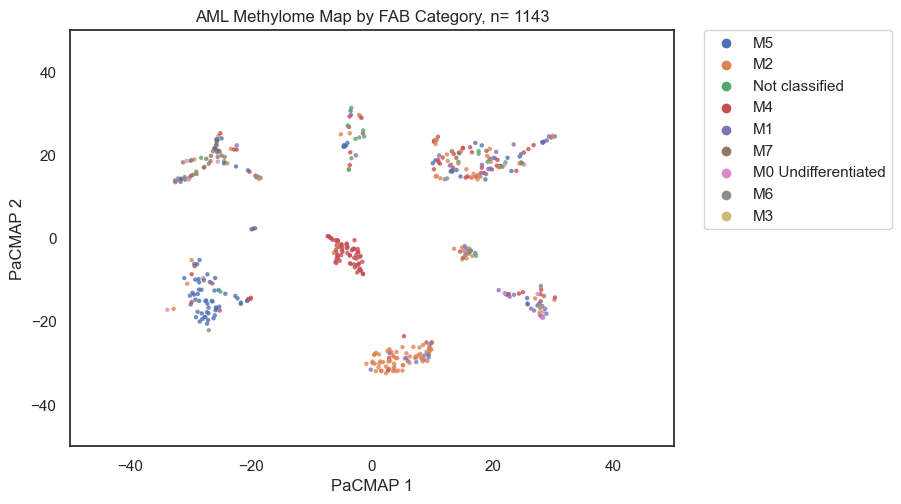

In [29]:
list = [None,'WHO Classification', 'Methyl Class', 'Vital Status', 'Complex Karyotype','FLT3 ITD','Risk Group','Age (years)', 'Gene Fusion', 'FAB Category']

for i in list:
    draw_pacmap(nanopore_sample.to_numpy(), y_nano, i, test_sample=None, panel_size=50)

In [30]:
cluster = select_range(df=x_train, x_range=(20, 40), y_range=(-40,-10))

In [31]:
y_train[y_train.index.isin(cluster.index)].to_excel(input_path+'cluster.xlsx')